# Setup Environment

In [ ]:
import os
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

# Install Dependencies

In [1]:
# !pip install -q git+https://github.com/huggingface/diffusers.git
!pip install -q peft==0.15.0 bitsandbytes
!git clone https://github.com/huggingface/diffusers
%cd diffusers
!pip install -e . -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.8/410.8 kB 6.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 14.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:0000:01m00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:0000:0100:04m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:0000:0100:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 5.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 7.7 MB/s eta 0:00:00:00:0100:01
Cloning into 'diffusers'...
remote: Enumerating objects: 98145, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 98145 (

In [ ]:
# !pip install git+https://github.com/huggingface/diffusers

In [2]:
%cd examples/controlnet

/kaggle/working/diffusers/examples/controlnet


# Training

In [ ]:
!accelerate launch train_controlnet.py \
     --pretrained_model_name_or_path="stabilityai/stable-diffusion-2-1" \
     --resume_from_checkpoint "./ckpts/Stable-Diffusion-2.1-Openpose-ControlNet/checkpoint-17500" \
     --output_dir="./ckpts/Stable-Diffusion-2.1-Openpose-ControlNet" \
     --dataset_name="HighCWu/open_pose_controlnet_subset" \
     --resolution=512 \
     --learning_rate=2e-4 \
     --train_batch_size=4 \
     --gradient_accumulation_steps=2 \
     --gradient_checkpointing \
     --use_8bit_adam \
     --num_train_epochs=50 \
     --mixed_precision "fp16" \
     --checkpoints_total_limit=2 \
     --checkpointing_steps=500 \
     --validation_steps=100
     # --image_column \
     # --conditioning_image_column \
     # --caption_column \
     # --max_train_steps=10000
     

Steps:  96%|████▊| 18000/18750 [52:01<1:18:01,  6.24s/it, loss=0.301, lr=0.0002]Configuration saved in ./ckpts/Stable-Diffusion-2.1-Openpose-ControlNet/checkpoint-18000/controlnet/config.json
Model weights saved in ./ckpts/Stable-Diffusion-2.1-Openpose-ControlNet/checkpoint-18000/controlnet/diffusion_pytorch_model.safetensors
Steps:  99%|████▉| 18500/18750 [1:44:08<26:02,  6.25s/it, loss=0.338, lr=0.0002]Configuration saved in ./ckpts/Stable-Diffusion-2.1-Openpose-ControlNet/checkpoint-18500/controlnet/config.json
Model weights saved in ./ckpts/Stable-Diffusion-2.1-Openpose-ControlNet/checkpoint-18500/controlnet/diffusion_pytorch_model.safetensors
Steps: 100%|█████| 18750/18750 [2:10:12<00:00,  6.26s/it, loss=0.416, lr=0.0002]Configuration saved in ./ckpts/Stable-Diffusion-2.1-Openpose-ControlNet/config.json
Model weights saved in ./ckpts/Stable-Diffusion-2.1-Openpose-ControlNet/diffusion_pytorch_model.safetensors
Steps: 100%|█████| 18750/18750 [2:10:16<00:00,  6.25s/it, loss=0.416, lr

# Inference

In [ ]:
!pip install -q controlnet-aux

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 5.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.4 MB/s eta 0:00:00:00:0100:01


In [5]:
import cv2
from PIL import Image
import numpy as np
# from diffusers.utils import load_image
from PIL import Image
import PIL
import requests

In [ ]:
from huggingface_hub import HfApi
from huggingface_hub import snapshot_download
import os

# Define the dataset name and local directory

repo_id = "danhtran2mind/Stable-Diffusion-2.1-Pose-ControlNet"
save_path = "./ckpts/Stable-Diffusion-2.1-Openpose-ControlNet"
os.makedirs(save_path, exist_ok=True)

# Download the dataset
snapshot_download(repo_id=repo_id, repo_type="model", local_dir=save_path)

Fetching 63 files:   0%|          | 0/63 [00:00<?, ?it/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/741M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

optimizer.bin:   0%|          | 0.00/741M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/741M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/741M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

(…)t.tfevents.1751709967.baa2ca0a8200.123.1:   0%|          | 0.00/2.42k [00:00<?, ?B/s]

hparams.yml: 0.00B [00:00, ?B/s]

(…)t.tfevents.1751776286.22e879528d54.144.1:   0%|          | 0.00/2.49k [00:00<?, ?B/s]

hparams.yml: 0.00B [00:00, ?B/s]

(…)t.tfevents.1751777266.22e879528d54.226.1:   0%|          | 0.00/2.49k [00:00<?, ?B/s]

hparams.yml: 0.00B [00:00, ?B/s]

(…)t.tfevents.1751777326.22e879528d54.271.1:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

(…)t.tfevents.1751803938.919e25877d10.178.1:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

hparams.yml: 0.00B [00:00, ?B/s]

(…)t.tfevents.1751870067.5f1be4f2c97f.132.1:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

hparams.yml: 0.00B [00:00, ?B/s]

(…)t.tfevents.1751886647.6a2d4df2f66d.119.1:   0%|          | 0.00/2.51k [00:00<?, ?B/s]

hparams.yml: 0.00B [00:00, ?B/s]

hparams.yml: 0.00B [00:00, ?B/s]

(…)t.tfevents.1751900165.6a2d4df2f66d.202.1:   0%|          | 0.00/2.51k [00:00<?, ?B/s]

(…)t.tfevents.1751900397.6a2d4df2f66d.247.1:   0%|          | 0.00/2.51k [00:00<?, ?B/s]

hparams.yml: 0.00B [00:00, ?B/s]

(…)t.tfevents.1751937967.89d248b593da.131.1:   0%|          | 0.00/2.51k [00:00<?, ?B/s]

hparams.yml: 0.00B [00:00, ?B/s]

(…)t.tfevents.1751949444.89d248b593da.242.1:   0%|          | 0.00/2.51k [00:00<?, ?B/s]

hparams.yml: 0.00B [00:00, ?B/s]

hparams.yml: 0.00B [00:00, ?B/s]

hparams.yml: 0.00B [00:00, ?B/s]

(…)t.tfevents.1751709966.baa2ca0a8200.123.0:   0%|          | 0.00/630k [00:00<?, ?B/s]

(…)t.tfevents.1751776286.22e879528d54.144.0:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

(…)t.tfevents.1751777266.22e879528d54.226.0:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

(…)t.tfevents.1751968498.d6ceb78bf7f3.132.1:   0%|          | 0.00/2.51k [00:00<?, ?B/s]

(…)t.tfevents.1751803938.919e25877d10.178.0:   0%|          | 0.00/315k [00:00<?, ?B/s]

(…)t.tfevents.1751777326.22e879528d54.271.0:   0%|          | 0.00/672k [00:00<?, ?B/s]

(…)t.tfevents.1751870067.5f1be4f2c97f.132.0:   0%|          | 0.00/378k [00:00<?, ?B/s]

(…)t.tfevents.1751886647.6a2d4df2f66d.119.0:   0%|          | 0.00/357k [00:00<?, ?B/s]

(…)t.tfevents.1751900165.6a2d4df2f66d.202.0:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

(…)t.tfevents.1751900397.6a2d4df2f66d.247.0:   0%|          | 0.00/147k [00:00<?, ?B/s]

(…)t.tfevents.1751949444.89d248b593da.242.0:   0%|          | 0.00/446k [00:00<?, ?B/s]

(…)t.tfevents.1751937967.89d248b593da.131.0:   0%|          | 0.00/307k [00:00<?, ?B/s]

(…)t.tfevents.1751968498.d6ceb78bf7f3.132.0:   0%|          | 0.00/215k [00:00<?, ?B/s]

'/kaggle/working/ckpts/Stable-Diffusion-2.1-Openpose-ControlNet'

In [7]:
def load_image(
    image, convert_method=None) -> PIL.Image.Image:
    """
    Loads `image` to a PIL Image.

    Args:
        image (`str` or `PIL.Image.Image`):
            The image to convert to the PIL Image format.
        convert_method (Callable[[PIL.Image.Image], PIL.Image.Image], *optional*):
            A conversion method to apply to the image after loading it. When set to `None` the image will be converted
            "RGB".

    Returns:
        `PIL.Image.Image`:
            A PIL Image.
    """
    if isinstance(image, str):
        if image.startswith("http://") or image.startswith("https://"):
            image = PIL.Image.open(requests.get(image, stream=True, timeout=200).raw)
        elif os.path.isfile(image):
            image = PIL.Image.open(image)
        else:
            raise ValueError(
                f"Incorrect path or URL. URLs must start with `http://` or `https://`, and {image} is not a valid path."
            )
    elif isinstance(image, PIL.Image.Image):
        image = image
    else:
        raise ValueError(
            "Incorrect format used for the image. Should be a URL linking to an image, a local path, or a PIL image."
        )

    image = PIL.ImageOps.exif_transpose(image)

    if convert_method is not None:
        image = convert_method(image)
    else:
        image = image.convert("RGB")

    return image

In [8]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid


In [ ]:
urls = "yoga1.jpeg", "yoga2.jpeg", "yoga3.jpeg", "yoga4.jpeg"
imgs = [
    load_image("https://huggingface.co/datasets/YiYiXu/controlnet-testing/resolve/main/" + url) 
    for url in urls
]

image_grid(imgs, 2, 2)


/usr/local/lib/python3.11/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/usr/local/lib/python3.11/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segmen

body_pose_model.pth:   0%|          | 0.00/209M [00:00<?, ?B/s]

hand_pose_model.pth:   0%|          | 0.00/147M [00:00<?, ?B/s]

facenet.pth:   0%|          | 0.00/154M [00:00<?, ?B/s]

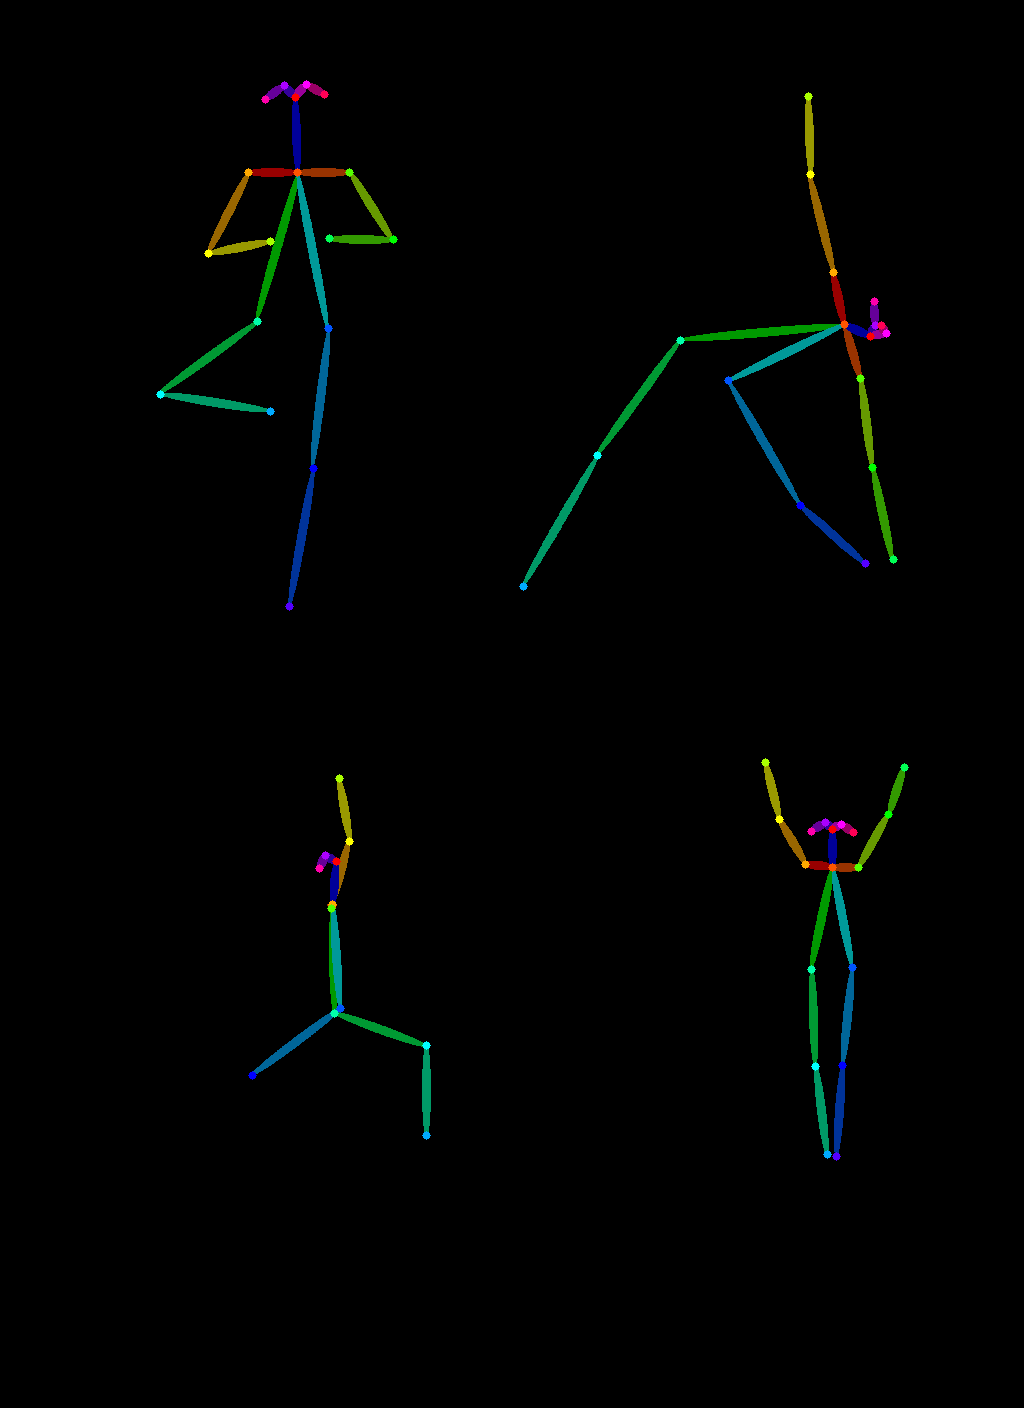

In [9]:
from controlnet_aux import OpenposeDetector

model = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

poses = [model(img) for img in imgs]
image_grid(poses, 2, 2)
# poses

In [10]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers import UniPCMultistepScheduler
import torch

controlnet = ControlNetModel.from_pretrained(
    "./ckpts/Stable-Diffusion-2.1-Openpose-ControlNet", torch_dtype=torch.float16
)

model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    model_id,
    controlnet=controlnet,
    torch_dtype=torch.float16,
)
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()


2025-07-08 12:18:18.767595: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751977098.965819      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751977099.020166      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

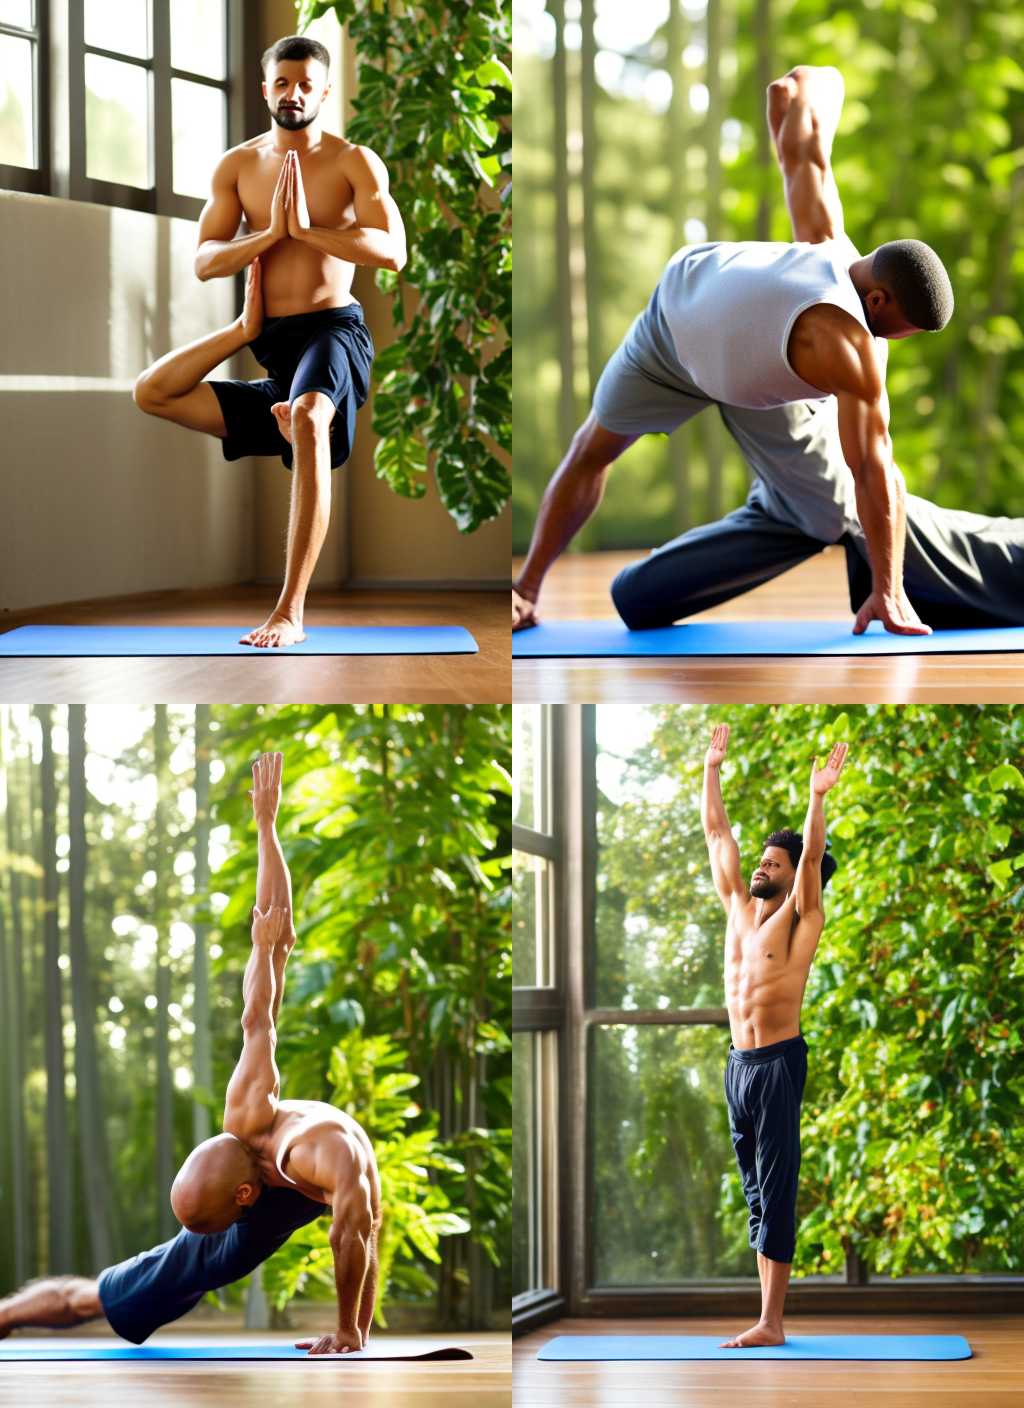

In [12]:
generator = [torch.Generator(device="cpu").manual_seed(2) for i in range(4)]
prompt = "a man is doing yoga"
output = pipe(
    [prompt] * 4,
    poses,
    negative_prompt=["monochrome, lowres, bad anatomy, worst quality, low quality"] * 4,
    generator=generator,
    num_inference_steps=20,
)
image_grid(output.images, 2, 2)
